In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import skew
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error, r2_score
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb


In [38]:
df_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

This step splits the ID column from the test dataset into a new dataframe. This will later be used in the submission file.

In [39]:
Submission = df_test['Id']

## Data Exploration

Explore the data by looking at the summary statistics to get a feel of the data. Alternatively, looking at the original dataset also helps you to understand the structure of the data.

In [40]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


**Key Takeaways**
1. Average SalePrice is $180,921
2. Potential outliers on LotArea and MiscVal with a large difference between 75% to Max.

In [41]:
#Get the data types of each variable
df_types = df_train.dtypes

Using a correlation matrix, we can identify the exploratory variables which are strongly correlated with SalePrice. These insights may shed light on which variables help predict the SalePrice.

Additionally, the correlation between pairs of variables will identifty any multicolinear factors which may distort the model.

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

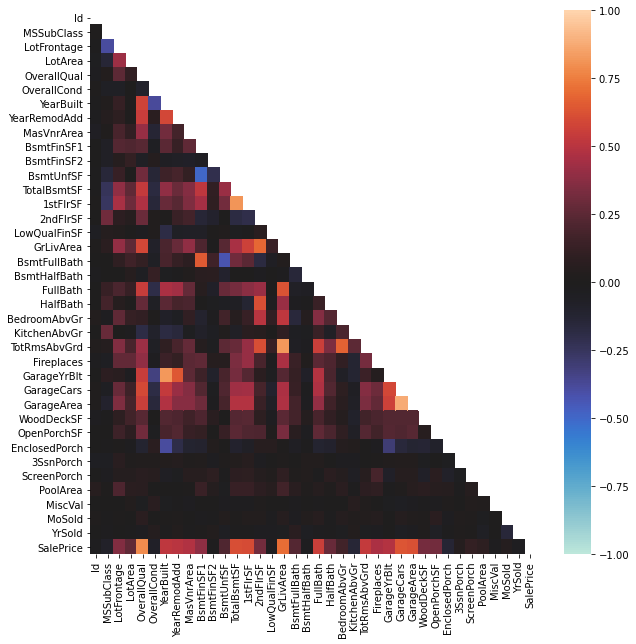

In [42]:
corr = df_train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)#
print(corr.SalePrice)

ax = plt.subplots(ncols=1, figsize=(10,10))
corr_matrix = df_train.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, mask=mask, vmin = -1, vmax = 1, center = 0);
plt.show()

**Key Takeaways**

Strongly Negative Correlated Variables
* BsmtUnffSF and BsmtFinfF1
> Makes sense
* BsmtFullBath and BsmtUnffSF
> Requires investigating
* Enclosed Porch and YearBuilt
> Requires investigating

Strongly Positive Correlated Variables
* GrLivArea and TotRmsAbvGrd
> > Requires investigating
* 1stFlrSF and TotalBsmtSF
> If there is more 1st floor space, then you would expect a similar sized basement floor too. However, its rare that the basement floor would be bigger than the first floor. A Home building article shows evidence that no further foundations would be required to support the house.
* GarageYrBlt and YearBuilt 
> makes sense given that the house and garage are normally built at the same time.*
* GarageArea and GarageCars
> May be a multicolinear factor that shows the same relationship.*

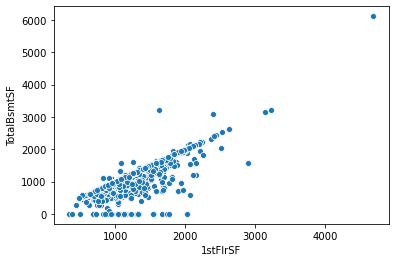

In [43]:
#Deep dive into one of our correlation pairs
sns.scatterplot(x= df_train['1stFlrSF'], y=df_train['TotalBsmtSF'])

# Explore the Target Variable

We need to do some exploratory analysis into the relationship between the target and exploratory variables. Showing boxplots of all the categorical variables (i.e object) and scatterplots for all those that are continuous in a good start.


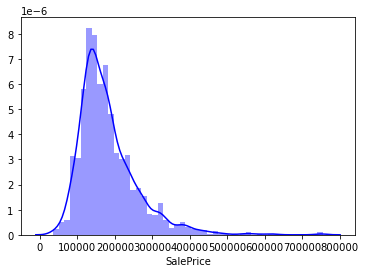

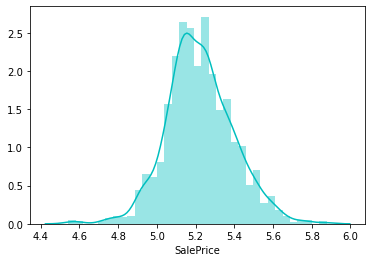

In [44]:
#Distribution plot of SalePrice
sns.distplot(df_train['SalePrice'], color="b");
plt.show()

#Log transformed distribution plot of SalePrice
Log_Y = df_train['SalePrice']
sns.distplot(np.log10(Log_Y), color="c");
plt.show()

**Key Takeaway**
1. The distribution of the target variable is right-skewed


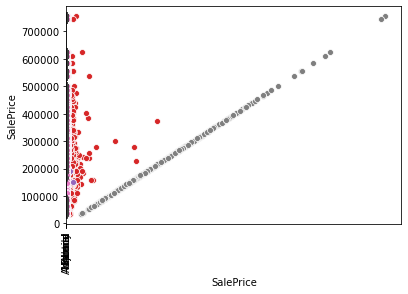

In [45]:
for i in df_train.select_dtypes(include='object').columns:
    sns.boxplot(x=df_train[i], y = df_train['SalePrice'])
    plt.xticks(rotation=90)
    #plt.show()
    
for i in df_train.select_dtypes(exclude='object').columns:
    sns.scatterplot(x=df_train[i], y=df_train['SalePrice'])
    #plt.show()

# Data Cleansing

Drop all the outliers. These rows have been removed because they do not represent the "normal population" and may skew the final result.

**Key Takeaways**
1. All of the variables below had at least one-two values which were away from the norm. 
2. One row had a very large lotArea and floor space 
> Perhaps this could have been a very large estate or a ranch?


In [46]:
#Finding all the outliers and their corresponding rows
print(df_train[(df_train['LotFrontage']>300)].index)
print(df_train[(df_train['LotArea']>200000)].index)
print(df_train[(df_train['BsmtFinSF1']>5000)].index)
print(df_train[(df_train['TotalBsmtSF']>5000)].index)
print(df_train[(df_train['1stFlrSF']>4000)].index)
print(df_train[(df_train['GrLivArea']>4500)].index)
print(df_train[(df_train['EnclosedPorch']>500)].index)
print(df_train[(df_train['MiscVal']>8000)].index)

Int64Index([934, 1298], dtype='int64')
Int64Index([313], dtype='int64')
Int64Index([1298], dtype='int64')
Int64Index([1298], dtype='int64')
Int64Index([1298], dtype='int64')
Int64Index([523, 1298], dtype='int64')
Int64Index([197], dtype='int64')
Int64Index([346, 1230], dtype='int64')


In [47]:
#I noticed that not dropping 934, 313 and 346 improved the RMSE score, but decided to exclude them anyway.
df_train = df_train.drop([523, 1298, 934, 313, 346, 197])

In [48]:
#Create new columns to identify the train and test dataset when it will be requried to split again
df_train['Train']=1
df_test['Train']=0

#Join datasets
df = pd.concat([df_train, df_test], axis=0)

In [49]:
#Change type of variables
df['MSSubClass'] = df['MSSubClass'].apply(str)
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)
df['YearRemodAdd'] = df['YearRemodAdd'].astype(str)

In [50]:
df = df.drop(["Id"], axis=1)

# Missing Values

Here we impute the missing values for all:
1. Numeric columns with the median
> I chose the median over the mean because it generally performs better on skewed distributions. Also the median is less sensitive to outliers.
2. Special columns where NA is not missing but instead not present 
> Need to rename "NA" otherwise they would be treated as missing data.
3. All categorical columns with the mode

In [51]:
quantitative = [f for f in df.columns if df.dtypes[f] != 'object']
qualitative = [f for f in df.columns if df.dtypes[f] == 'object']

#Fill missing values for quantitative variables
for i in quantitative:
    df.fillna(df.median(), inplace = True)
    #print(i, df[i].median())
    
#Fill missing values for special variables
spec_categ_col =['PoolArea', 'Fence', 'MiscFeature', 'Alley','FireplaceQu']
for i in spec_categ_col:
    df[i] = df[i].fillna('None')
    
#Fill missing values for categorical variables
for i in qualitative:
    df[i].fillna(df[i].mode()[0], inplace = True)
    
#Check missing values for all variables
df.isnull().sum().sum()

0

# Transform variables

Initially, I only transformed the variables with high positive skew. In the future, I would probably find a way to automate those with a skew > a set value.

In [52]:
df.skew(axis = 0, skipna = True).sort_values(ascending=False)

MiscVal          23.351597
PoolArea         18.647496
LowQualFinSF     12.330656
3SsnPorch        11.369962
LotArea          10.421630
KitchenAbvGr      4.299354
BsmtFinSF2        4.162174
EnclosedPorch     3.955567
ScreenPorch       3.943946
BsmtHalfBath      3.943319
SalePrice         3.033902
MasVnrArea        2.620922
OpenPorchSF       2.528887
WoodDeckSF        1.844066
MSSubClass        1.375035
1stFlrSF          1.260588
GrLivArea         1.068619
BsmtFinSF1        0.983503
BsmtUnfSF         0.919039
2ndFlrSF          0.860599
TotRmsAbvGrd      0.752105
Fireplaces        0.726676
LotFrontage       0.723704
HalfBath          0.694846
TotalBsmtSF       0.675923
BsmtFullBath      0.620675
OverallCond       0.570040
BedroomAbvGr      0.327864
GarageArea        0.219133
MoSold            0.196385
OverallQual       0.191446
FullBath          0.166972
YrSold            0.131944
Train             0.003435
GarageCars       -0.218185
GarageYrBlt      -0.398475
YearRemodAdd     -0.449792
Y

In [53]:
#Log Transform variables to make them better fitted to the regression model
Num = 1
if Num <= 1:
    df["LotArea"] = np.log1p(df["LotArea"])
    df["LotFrontage"] = np.log1p(df["LotFrontage"])
    df["GrLivArea"] = np.log1p(df["GrLivArea"])
else:
    num_feats = df.dtypes[df.dtypes != "object"].index
    skewed_feats =df[num_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
    skewed_feats = skewed_feats[skewed_feats > 0.75]
    skewed_feats = skewed_feats.index
    skewed_feats
    df[skewed_feats] = np.log1p(df[skewed_feats])

# Feature Engineering


In [54]:
#Feature Engineering
#Total Floor area of entire house
df['TotalSF']=df['TotalBsmtSF']+ df['1stFlrSF']+ df['2ndFlrSF']
#Total number of baths
df['TotalBath'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))
#Total porch area
df['TotalPorchSF'] = df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + df['ScreenPorch']+ df['WoodDeckSF']

# **Prepare Data for Modelling**

In [55]:
#Create dummy variables for categorical columns.
df = pd.get_dummies(data=df)

In [56]:
#Split into training and test dataset from the original data
df_train = df[df["Train"] ==1]
df_test = df[df["Train"] ==0]

In [57]:
#Drop the unwanted columns
df_train = df_train.drop(["Train"], axis=1)
df_test = df_test.drop(["Train"], axis=1)
df_test = df_test.drop(["SalePrice"], axis=1)

In [58]:
if Num <= 1:
    y = np.log1p(df_train["SalePrice"]).values
else:
    y = df_train.SalePrice


In [59]:
x = df_train.drop(["SalePrice"], axis=1)

# **Modelling **

In [60]:
Lasso_model = LassoCV(alphas = [1, 0.1,0.05, 0.001, 0.0005], selection='random', max_iter=15000).fit(x, y)
Lasso_train = Lasso_model.predict(x)
Lasso_Test = Lasso_model.predict(df_test)

print(np.sqrt(mean_squared_error(y,Lasso_train)))
print(r2_score(y, Lasso_train))
#print(np.sqrt(mean_squared_error(Validate,Lasso_Test)))

0.09730298660601448
0.9406269625079526


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9664666920031006, tolerance: 0.023186088012098975
  positive)


In [61]:
#Random Forest Regressor
forest_model = RandomForestRegressor(
    random_state=10, 
    n_estimators=3000,
    max_depth=10, 
    max_features='sqrt',
    min_samples_leaf=15, 
    criterion='mse', 
    min_samples_split=10)

forest_model.fit(x,y)
forest_train = forest_model.predict(x)
Forest_Test = forest_model.predict(df_test)

print(np.sqrt(mean_squared_error(y,forest_train)))
print(r2_score(y, forest_train))
#print(np.sqrt(mean_squared_error(Validate,Forest_Test)))

0.15264133616444964
0.8538895613777289


In [62]:
#Gradient Boosting Regressor
gbr_model = ensemble.GradientBoostingRegressor(
    n_estimators=3000, 
    learning_rate=0.01,
    max_depth=10, 
    max_features='sqrt',
    min_samples_leaf=15, 
    criterion='mse', 
    min_samples_split=10, 
    random_state =10).fit(x,y)

gbr_train = gbr_model.predict(x)
gbr_Test = gbr_model.predict(df_test)

print(np.sqrt(mean_squared_error(y,gbr_train)))
print(r2_score(y, gbr_train))
#print(np.sqrt(mean_squared_error(Validate,gbr_Test)))

0.0257674030092593
0.9958363115433794


In [63]:
#Ridge Regression
Ridge_model = Ridge(alpha=0.05)
Ridge_model.fit(x, y)
Ridge_train = Ridge_model.predict(x)
Ridge_Test = Ridge_model.predict(df_test)

#print(pd.Series(Ridge_model.coef_, index = x.columns))

print(np.sqrt(mean_squared_error(y,Ridge_train)))
print(r2_score(y, Ridge_train))
#print(np.sqrt(mean_squared_error(Validate,Ridge_Test)))

0.08478828949464168
0.9549174290977566


In [64]:
#Ridge Regression
Ridge_model = Ridge(alpha=0.05)
Ridge_model.fit(x, y)
Ridge_train = Ridge_model.predict(x)
Ridge_Test = Ridge_model.predict(df_test)

#print(pd.Series(Ridge_model.coef_, index = x.columns))

print(np.sqrt(mean_squared_error(y,Ridge_train)))
print(r2_score(y, Ridge_train))
#print(np.sqrt(mean_squared_error(Validate,Ridge_Test)))

0.08478828949464168
0.9549174290977566


# Hybrid Models - combine different models

In [65]:
Hybrid_train = 0.5*Lasso_train + 0.5*gbr_train
print(np.sqrt(mean_squared_error(y,Hybrid_train)))
print(r2_score(y, Hybrid_train))

0.05927523570012075
0.977966499203335


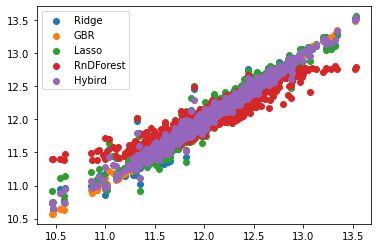

In [66]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(y,Ridge_train, label ='Ridge')
ax1.scatter(y,gbr_train, label ='GBR')
ax1.scatter(y,Lasso_train, label ='Lasso')
ax1.scatter(y,forest_train, label ='RnDForest')
ax1.scatter(y,Hybrid_train, label ='Hybird')
plt.legend(loc='upper left')
plt.show()

**Model Evaluation**

1. R-Squared to evaluate the validity of the model
2. Root Mean Square Error (RMSE) to measure the variation between the actual and the forecast

The best performing model was the multiple regression with an overall better R2 value and RMSE.

However, upon submission the Lasso Regression Model performed better.
>Ridge RMSE    = 0.13293

>Lasso RMSE    = 0.11965

>Mult Reg RMSE = Errors in output inf and zeroes on some IDs.

**Submission File**

In [69]:
df = pd.DataFrame({'Predicted': Lasso_Test})
df = np.exp(df)
Sub = pd.DataFrame()
Sub['Id'] = Submission
Sub['SalePrice'] = df
Sub.to_csv('submission3.csv',index=False)

